## PACKAGES

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a name='1.1'></a>
### 1 - Simple Linear Regression Model

You can describe a simple linear regression model as

$$\hat{y} = wx + b,\tag{1}$$

where $\hat{y}$ is a prediction of dependent variable $y$ based on independent variable $x$ using a line equation with the slope $w$ and intercept $b$. 

Given a set of training data points $(x_1, y_1)$, ..., $(x_m, y_m)$, you will find the "best" fitting line - such parameters $w$ and $b$ that the differences between original values $y_i$ and predicted values $\hat{y}_i = wx_i + b$ are minimum.

<a name='1.2'></a>
### 1.2 - Neural Network Model with a Single Perceptron and One Input Node

The simplest neural network model that describes the above problem can be realized by using one **perceptron**. The **input** and **output** layers will have one **node** each ($x$ for input and $\hat{y} = z$ for output):

<img src="images/nn_model_linear_regression_simple.png" style="width:400px;">

**Weight** ($w$) and **bias** ($b$) are the parameters that will get updated when you **train** the model. They are initialized to some random values or set to 0 and updated as the training progresses.

For each training example $x^{(i)}$, the prediction $\hat{y}^{(i)}$ can be calculated as:

\begin{align}
z^{(i)} &=  w x^{(i)} + b,\\
\hat{y}^{(i)} &= z^{(i)},
\tag{2}\end{align}

where $i = 1, \dots, m$.

You can organise all training examples as a vector $X$ of size ($1 \times m$) and perform scalar multiplication of $X$ ($1 \times m$) by a scalar $w$, adding $b$, which will be broadcasted to a vector of size ($1 \times m$):

\begin{align}
Z &=  w X + b,\\
\hat{Y} &= Z,
\tag{3}\end{align}

This set of calculations is called **forward propagation**.

### 1.1 - DATASET

In [79]:
adv = pd.DataFrame(
    {
        "TV": [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 98.5, 23.5, 78.3, 109.1],
        "Sales": [22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 15.3, 7.6, 16.3, 14.5]
    }
)

print(adv)


      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9
5    8.7    7.2
6   98.5   15.3
7   23.5    7.6
8   78.3   16.3
9  109.1   14.5


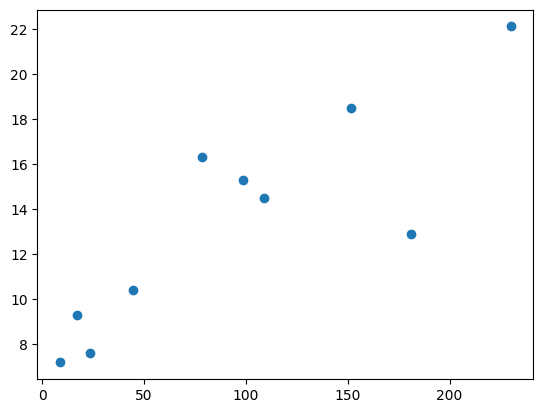

In [81]:
plt.scatter(
    x = adv['TV'],
    y = adv['Sales']
);

In [99]:
adv

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
5,8.7,7.2
6,98.5,15.3
7,23.5,7.6
8,78.3,16.3
9,109.1,14.5


TV numbers are too different from sales, so we should normalize data

In [96]:
adv_norm = (adv - np.mean(adv)) / np.std(adv, axis=0)
adv_norm

,TV,Sales
0,2.481834,-6.870757
1,-0.131142,-9.405452
2,-0.515485,-9.643757
3,1.375261,-7.650663
4,1.787762,-8.863850
5,-0.635153,-10.098702
6,0.629099,-8.343913
7,-0.426791,-10.012046
8,0.344713,-8.127272
9,0.778332,-8.517226


<Axes: xlabel='TV', ylabel='Sales'>

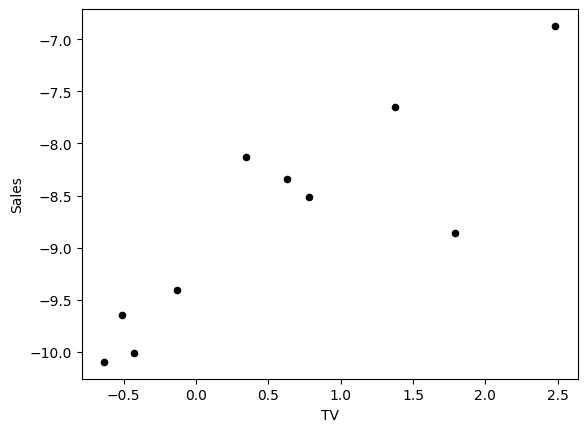

In [97]:
adv_norm.plot(x='TV', y='Sales', kind='scatter', c='black')

Save the fields into variables X_norm and Y_norm and reshape them to row vectors

In [98]:
X_norm = adv_norm['TV']
Y_norm = adv_norm['Sales']

X_norm = np.array(X_norm).reshape(1, len(X_norm))
Y_norm = np.array(Y_norm).reshape(1, len(Y_norm))

## 2 -  IMPLEMENTATION OF THE NEURAL NETWORK MODEL FOR LINEAR REGRESSION

### 2 - DEFINING THE NEURAL NETWORK STRUCTURE

Define two variables:
- `n_x`: the size of the input layer
- `n_y`: the size of the output layer

using shapes of arrays `X` and `Y`.

In [103]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_y -- the size of the output layer
    """
    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    return (n_x, n_y)

(n_x, n_y) = layer_sizes(X_norm, Y_norm)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 1
The size of the output layer is: n_y = 1
